In [79]:
#importing the important libraries in python
#In this the most important is the autograd which automatically computes the gradient
import autograd.numpy as np
import autograd.numpy.random as npr #for generating the random numbers from the normal distribution 
from autograd import grad
import sklearn.metrics
import pylab

In [82]:
#Generating the dataset
examples = 1000
features = 100
D = (npr.randn(examples, features), npr.randn(examples))
#This generates 1000 rows of 100 columns in each in very simple language

In [83]:
'''numpy.random.randn(d0, d1, …, dn) : creates 
an array of specified shape and fills it with random values as per standard normal distribution.
If positive arguments are provided, randn generates an array of shape (d0, d1, …, dn), 
filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 
and variance 1 (if any of the d_i are floats, they are first converted to integers by truncation). 
A single float randomly sampled from the distribution is returned if no argument is provided.'''

'numpy.random.randn(d0, d1, …, dn) : creates \nan array of specified shape and fills it with random values as per standard normal distribution.\nIf positive arguments are provided, randn generates an array of shape (d0, d1, …, dn), \nfilled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 \nand variance 1 (if any of the d_i are floats, they are first converted to integers by truncation). \nA single float randomly sampled from the distribution is returned if no argument is provided.'

In [84]:
layer1_units = 10
layer2_units = 1

In [85]:
#setting the weight and biases by using randn function which follows the standard normal distribution
w1 = npr.rand(features, layer1_units)
b1 = npr.rand(layer1_units)
w2 = npr.rand(layer1_units, layer2_units)
b2 = 0.0

In [87]:
theta = (w1, b1, w2, b2)
#theta is the tuple of the parameters in our simple feed forward neural network

In [88]:
#squared loss function
def squared_loss(y, y_hat):
    return np.dot((y - y_hat),(y - y_hat))

In [89]:
#binary cross entropy for two class problem
def binary_cross_entropy(y, y_hat):
    return np.sum(-((y * np.log(y_hat)) + ((1-y) * np.log(1 - y_hat))))

In [90]:
#the neural network basic operation of performing and calculating the linear combination and put it into the 
#activation function
def neural_network(x, theta):
    w1, b1, w2, b2 = theta
    return np.tanh(np.dot((np.tanh(np.dot(x,w1) + b1)), w2) + b2)

In [93]:
#the objective which has to be minimized
def objective(theta, idx):
    return squared_loss(D[1][idx], neural_network(D[0][idx], theta))

In [110]:
#Update the Parameter after every example  stochastic gradient Descent
def update_theta(theta, delta, alpha):
    w1, b1, w2, b2 = theta
    w1_delta, b1_delta, w2_delta, b2_delta = delta
    w1_new = w1 - alpha * w1_delta
    b1_new = b1 - alpha * b1_delta
    w2_new = w2 - alpha * w2_delta
    b2_new = b2 - alpha * b2_delta
    new_theta = (w1_new,b1_new,w2_new,b2_new)
    return new_theta


In [106]:
grad_objective = grad(objective)
grad_objective

<function autograd.wrap_util.unary_to_nary.<locals>.nary_operator.<locals>.nary_f(*args, **kwargs)>

In [108]:
#Number Of Epochs on which our neural network will work
epochs = 10

In [103]:
print("RMSE before training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))
rmse = []
for i in range(0, epochs):
    for j in range(0, examples):
        delta = grad_objective(theta, j)
        theta = update_theta(theta,delta, 0.01)
        rmse.append(sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))

print("RMSE after training:", sklearn.metrics.mean_squared_error(D[1],neural_network(D[0], theta)))

RMSE before training: 1.9880800826249097
RMSE after training: 0.748710171111754


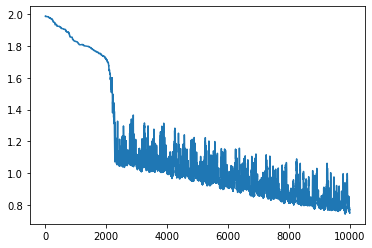

In [107]:
#RMSE (Root Mean Square error Plot)
pylab.plot(rmse)
pylab.show()